### From the book "Python Machine Learning for Beginners" by AI Publishing

#### 8.2 Hierarchical Clustering

In [26]:
# Like K Means clustering, hierarchical clustering is another commonly used unsupervised 
# machine learning technique for data clustering. Hierarchical clustering can be broadly 
# divided into two types: agglomerative clustering and divisive clustering. 
# Agglomerative clustering follows a bottom-up approach, where individual data points are 
# clustered together to form multiple small clusters leading to a big cluster, which can then 
# be divided into small clusters using dendrograms. 
# On the other hand, in the case of divisive clustering, you have one big cluster, which you 
# divide into N number of small clusters.

8.2.1 Clustering Dummy Data

Example 1

In [27]:
# First, we will see how to perform hierarchical clustering on dummy data, and then we will perform 
# hierarchical clustering on Iris data.
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline

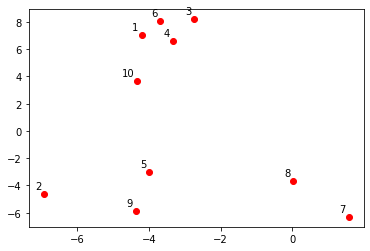

In [29]:
# Randomly creates data points and then labels the data points from 1 to 10. 
# The data points are plotted as a scatter plot.

# Generating dummy data of 10 records with 2 clusters
features, labels = make_blobs(n_samples=10, centers=2, cluster_std=2.00)

# Plotting the dummy data
plt.scatter(features[:,0], features[:,1], color='r')

#Add numbers to data points
annots = range(1, 11)
for label, x, y in zip(annots, features[:,0], features[:,1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-3, 3),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

In [30]:
# From the output above, it can be clearly seen that the data points 1, 3, 4, 6, and 10 belong to 
# one cluster and the data points 2, 5, 7, 8, and 9 belong to the other cluster.

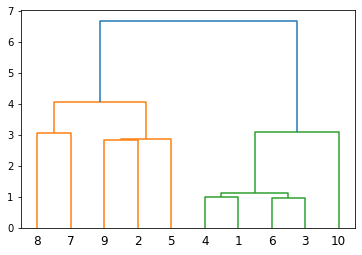

In [35]:
# Let’s now plot dendrograms for the above 10 data points. To plot dendrograms, you can use the 
# dendrogram and linkage classes from the scipy.cluster.hierarchy module. The features are passed to 
# the linkage class. And the object of the linkage class is passed to the dendrogram class to plot 
# dendrogram for the features
from scipy.cluster.hierarchy import dendrogram, linkage

dendos = linkage(features, 'single')
annots = range(1, 11)
dendrogram(dendos,
           orientation='top',
           labels=annots,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

In [36]:
# From the figure above, it can be seen that points 2 and 5 are closest to each other. 
# Hence, a cluster is formed by connecting these points. Thecluster of 2 and 5 is closest to 
# data point 9, resulting in a cluster containing points 2, 5, and 9. In the same way, 
# the remaining clusters are formed until a big cluster is formed.

# After a big cluster is formed,select the longest vertical line. Then, draw a horizontal line 
# through it. The number of clusters formed is equal to the number of vertical lines this newly 
# created horizontal line passes.

In [39]:
# In real world scenarios, there can be thousands of data points, and hence,the dendrogram method 
# cannot be used to manually cluster the data. This is where we can use the AgglomerativeClustering 
# class from the sklearn.cluster module. The number of clusters and the distance types are passed 
# as parameters to the AgglomerativeClustering class.
from sklearn.cluster import AgglomerativeClustering

# Training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

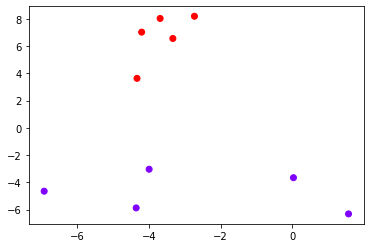

In [40]:
# Plots the predicted clusters
plt.scatter(features[:,0], features[:,1], c=hc_model.labels_, cmap='rainbow')

Example 2

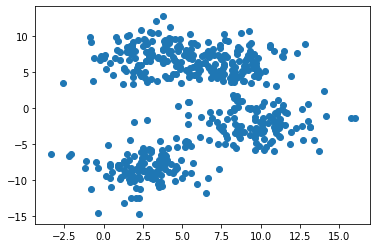

In [42]:
# In the previous example, we had 10 data points with 2 clusters. Let’s now see an example 
# with 500 data points. The following script creates 500 datapoints with 4 cluster centers.

# Generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std=2.00)

# Plotting the dummy data
plt.scatter(features[:,0], features[:,1])

In [43]:
# Applies agglomerative hierarchical clustering on the dataset. The number of predicted clusters 
# is 4

# Performing kmeans clustering using AgglomerativeClustering class
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 2, 3, 3, 0, 1, 2, 0, 1, 2, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 0, 0,
       0, 2, 2, 3, 1, 1, 1, 0, 3, 1, 1, 2, 3, 2, 0, 3, 2, 3, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 1, 3, 0, 1, 2, 1, 3, 0, 3, 1, 0, 0, 3, 0, 1, 2,
       3, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 3, 0, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 0, 1, 0, 1, 2, 3, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 3, 2, 0,
       2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 3, 1, 3, 2, 3, 3, 2, 1,
       3, 0, 3, 2, 1, 1, 3, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 3, 3, 3, 0, 0,
       0, 0, 2, 2, 3, 1, 2, 1, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 0, 0, 2, 1, 1,
       1, 3, 3, 3, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 3, 2, 1, 3,
       3, 3, 1, 0, 1, 3, 3, 2, 0, 3, 0, 0, 3, 1, 1, 1, 3, 0, 2, 1, 1, 0,
       1, 2, 3, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3,
       1, 0, 2, 0, 1, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1,

In [44]:
# The output shows the labels of the data points in our dataset. You can see that 
# since there are 4 clusters, there are 4 unique labels, i.e., 0, 1, 2, and 3.

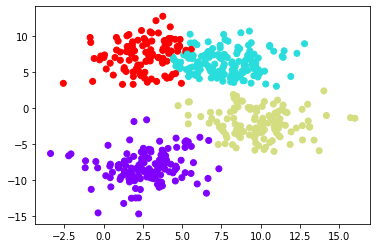

In [46]:
# Printing the data points
plt.scatter(features[:,0], features[:,1], c=hc_model.labels_, cmap='rainbow')

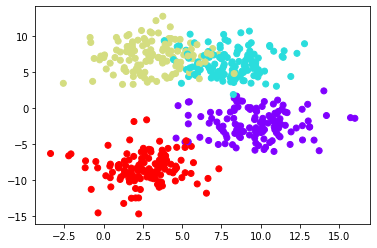

In [47]:
# Plot the actual clusters in the dataset (for the sake of comparison)
plt.scatter(features[:,0], features[:,1], c=labels, cmap='rainbow')

8.2.2 Clustering the Iris Dataset

In [48]:
# In this section, you will see how to cluster the Iris dataset using hierarchical agglomerative 
# clustering. The following script imports the Iris dataset and displays the first five rows of the dataset.
import seaborn as sns

iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
# Divides the data into features and labels sets and displays the first five rows of the labels set.
features = iris_df.drop(['species'], axis=1)
labels = iris_df.filter(['species'], axis=1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
# Applies the agglomerative clustering on the feature set using the AgglomerativeClustering class 
# from the sklearn.cluster module.

from sklearn.cluster import AgglomerativeClustering

# Training agglomerative clustering model
features = features.values
hc_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [54]:
# The output above shows the predicted cluster labels for the feature set inthe Iris dataset.

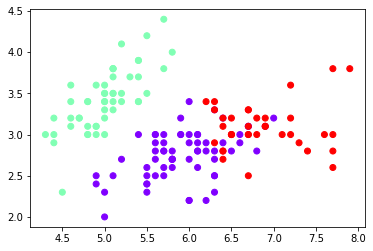

In [55]:
# Printing the data points
plt.scatter(features[:,0], features[:,1], c=hc_model.labels_, cmap='rainbow')

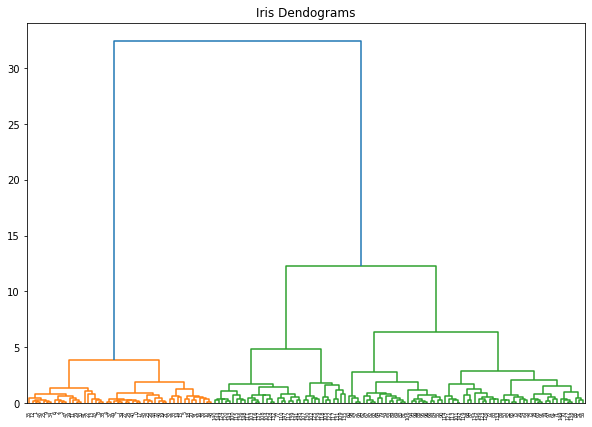

In [56]:
# You can also create dendrograms using the feature set using the shc module 
# from the scipy.cluster.hierarchy library. You have to pass the feature
# set to the linkage class of the shc module, and then the object 
# of the linkageclass is passedto the dendrogram class to plot the dendrograms.
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title('Iris Dendograms')
dend = shc.dendrogram(shc.linkage(features, method='ward'))

In [ ]:
# If you want to cluster the dataset into three clusters, you can simply draw a horizontal line that passes through the three vertical lines. 
# The clusters below the horizontal line are the resultant clusters. 
# In the following figure, we form three clusters.